In [ ]:
#! hub install human_pose_estimation_resnet50_mpii==1.1.1

In [1]:
import os
import cv2
import paddlehub as hub
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
%matplotlib inline

/opt/anaconda3/envs/paddle_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/paddle_env/lib/python3.8/site-packages/_distutils_hack/__init__.py:36: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## Display images

In [2]:
# Display the specified path image
def show_img(img_path, size=8):
    im = imread(img_path)
    plt.figure(figsize=(size,size))
    plt.axis("off")
    plt.imshow(im)

In [3]:
# Display the image read by Opencv and convert the image channel to RGB format
def img_show_bgr(image,size=8):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(size,size))
    plt.imshow(image)
    plt.axis("off")
    plt.show() 

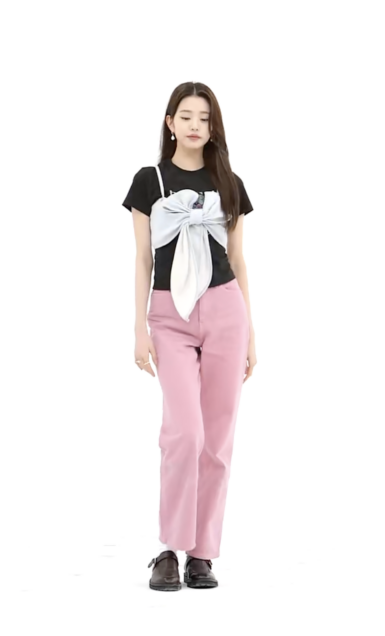

In [4]:
show_img('test/test.png')

In [6]:
pose_estimation = hub.Module(name="human_pose_estimation_resnet50_mpii")
result = pose_estimation.keypoint_detection(paths=['test/test.png'], visualization=True, output_dir="test/test_output")

image saved in test/test_output/test.jpg


In [7]:
result

[{'path': 'test/test.png',
  'data': OrderedDict([('left_ankle', [410, 1334]),
               ('left_knee', [438, 1045]),
               ('left_hip', [400, 755]),
               ('right_hip', [534, 723]),
               ('right_knee', [524, 1045]),
               ('right_ankle', [477, 1351]),
               ('pelvis', [467, 739]),
               ('thorax', [438, 434]),
               ('upper_neck', [448, 369]),
               ('head_top', [458, 176]),
               ('right_wrist', [324, 788]),
               ('right_elbow', [333, 627]),
               ('right_shoulder', [333, 418]),
               ('left_shoulder', [543, 434]),
               ('left_elbow', [572, 627]),
               ('left_wrist', [601, 804])])}]

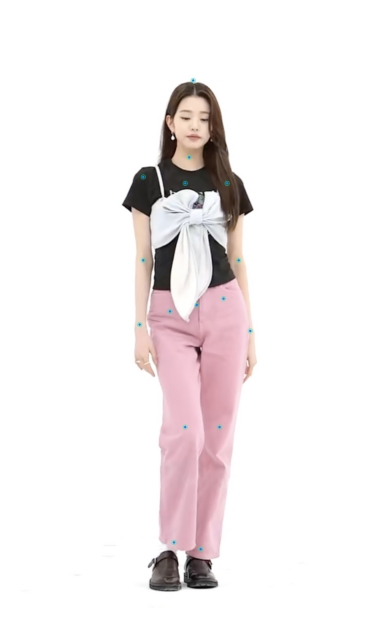

In [8]:
show_img('test/test_output/test.jpg')

In [13]:
import cv2
import numpy as np

# 载入躯干图片 (JPG 格式，不包含透明通道)
body_image = cv2.imread('puppet_parts/body.jpg')  # 加载JPG图片
head_image = cv2.imread('puppet_parts/head.jpg') 
left_arm_image = cv2.imread('puppet_parts/leftarm.jpg') 
left_hand_image = cv2.imread('puppet_parts/lefthand.jpg') 
left_leg_image = cv2.imread('puppet_parts/leftleg.jpg') 
right_arm_image = cv2.imread('puppet_parts/rightarm.jpg') 
right_hand_image = cv2.imread('puppet_parts/righthand.jpg') 
right_leg_image = cv2.imread('puppet_parts/rightleg.jpg') 


# 获取图片的宽度和高度
body_height, body_width = body_image.shape[:2]

# 创建一个大小为 500x500 的空白画布（黑色背景）
canvas = np.zeros((2500, 2500, 3), dtype=np.uint8)* 255

# 计算图片放置的位置（画布中心）
center_y = (canvas.shape[0] - body_height) // 2
center_x = (canvas.shape[1] - body_width) // 2

# 将图片放在画布中心（复制到画布的相应区域）
canvas[center_y:center_y + body_height, center_x:center_x + body_width] = body_image

# 显示结果
cv2.imshow('Centered Puppet Body', canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()

: 

In [ ]:
# 载入躯干图片 (JPG 格式，不包含透明通道)
body_image = cv2.imread('puppet_parts/body.jpg')  # 加载JPG图片
head_image = cv2.imread('puppet_parts/head.jpg') 
left_arm_image = cv2.imread('puppet_parts/leftarm.jpg') 
left_hand_image = cv2.imread('puppet_parts/lefthand.jpg') 
left_leg_image = cv2.imread('puppet_parts/leftleg.jpg') 
right_arm_image = cv2.imread('puppet_parts/rightarm.jpg') 
right_hand_image = cv2.imread('puppet_parts/righthand.jpg') 
right_leg_image = cv2.imread('puppet_parts/rightleg.jpg') 

In [ ]:
# 创建一个大小为 500x500 的空白画布
canvas = np.zeros((2500, 2500, 3), dtype=np.uint8)* 255
# 获取图片的宽度和高度
body_height, body_width = body_image.shape[:2]
# 计算图片放置的位置（画布中心）
body_y = (canvas.shape[0] - body_height) // 2
body_x = (canvas.shape[1] - body_width) // 2

# 将图片放在画布中心（复制到画布的相应区域）
canvas[body_y:body_y + body_height, body_x:body_x + body_width] = body_image
# 输入旋转角度
rotation_angle = 30  # 可以根据需要调整这个值

# 计算旋转矩阵 (旋转中心设为头部的中心)
rotation_matrix = cv2.getRotationMatrix2D((head_width // 2, head_height // 2), rotation_angle, 1.0)

# 旋转 head 图片
rotated_head = cv2.warpAffine(head_image, rotation_matrix, (head_width, head_height))

# 计算 head 放置在 body 正上方的位置
head_y = center_y - head_height  # head 在 body 上方，Y 位置在 body 的上方
head_x = center_x + (body_width - head_width) // 2  # 保证 head 和 body 水平居中对齐

# 确保头部位置在画布范围内
if head_y >= 0:
    # 将旋转后的 head 放置在 body 的上方
    canvas[head_y:head_y + head_height, head_x:head_x + head_width] = rotated_head

# 显示结果
cv2.imshow('Puppet with Rotated Head', canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
import cv2
import numpy as np

# 载入躯干和头部图片 (PNG 格式，带透明通道)
body_image = cv2.imread('puppet_parts/body.png', cv2.IMREAD_UNCHANGED)  # 加载PNG，保持透明通道
head_image = cv2.imread('puppet_parts/head.png', cv2.IMREAD_UNCHANGED)  # 加载PNG，保持透明通道

# 获取 body 和 head 图片的尺寸
body_height, body_width = body_image.shape[:2]
head_height, head_width = head_image.shape[:2]

# 创建一个大小为 2000x1000 的空白画布
canvas = np.zeros((4000, 2000, 4), dtype=np.uint8)

# 将 body 图片放置在画布的中心 (考虑透明通道)
b, g, r, a = cv2.split(body_image)
for c in range(0, 3):
    canvas[center_y:center_y + body_height, center_x:center_x + body_width, c] = \
        body_image[:, :, c]
canvas[center_y:center_y + body_height, center_x:center_x + body_width, 3] = a

# 将 body 放置在画布的中心
#canvas[center_y:center_y + body_height, center_x:center_x + body_width] = body_image

# 输入旋转角度
rotation_angle = 0  # 可以根据需要调整这个值

# 计算旋转矩阵 (旋转中心设为头部的中心)
rotation_matrix = cv2.getRotationMatrix2D((head_width // 2, head_height // 2), rotation_angle, 1.0)

# 旋转 head 图片
rotated_head = cv2.warpAffine(head_image, rotation_matrix, (head_width, head_height))

# 计算 head 放置在 body 正上方的位置
head_y = center_y - head_height +800 # head 在 body 上方，Y 位置在 body 的上方
head_x = center_x + (body_width - head_width) // 2 +170 # 保证 head 和 body 水平居中对齐

# 确保头部位置在画布范围内
if head_y >= 0:
    # 将旋转后的 head 放置在 body 的上方
    canvas[head_y:head_y + head_height, head_x:head_x + head_width] = rotated_head
# 将 body 放置在画布的中心
canvas[center_y:center_y + body_height, center_x:center_x + body_width] = body_image
# 显示结果
cv2.imshow('Puppet with Rotated Head', canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
import cv2
import numpy as np

# 载入躯干和头部图片 (PNG 格式，带透明通道)
body_image = cv2.imread('puppet_parts/body.png', cv2.IMREAD_UNCHANGED)  # 加载PNG，保持透明通道
head_image = cv2.imread('puppet_parts/head.png', cv2.IMREAD_UNCHANGED)  # 加载PNG，保持透明通道

# 获取 body 和 head 图片的尺寸
body_height, body_width = body_image.shape[:2]
head_height, head_width = head_image.shape[:2]

# 创建一个大小为 4000x2000 的白色画布（带透明通道）
canvas = np.ones((4000, 2000, 4), dtype=np.uint8) * 255  # 白色 (RGB: 255, 255, 255)，Alpha: 255 (不透明)

# 计算 body 放置在画布中的中心位置
center_y = (canvas.shape[0] - body_height) // 2
center_x = (canvas.shape[1] - body_width) // 2

# 将 body 图片放置在画布的中心 (考虑透明通道)
b, g, r, a = cv2.split(body_image)
for c in range(0, 3):
    canvas[center_y:center_y + body_height, center_x:center_x + body_width, c] = \
        body_image[:, :, c]
canvas[center_y:center_y + body_height, center_x:center_x + body_width, 3] = a

# 输入旋转角度
rotation_angle = 30  # 旋转角度

# 计算旋转矩阵 (旋转中心设为头部的中心)
rotation_matrix = cv2.getRotationMatrix2D((head_width // 2, head_height // 2), rotation_angle, 1.0)

# 旋转 head 图片，同时处理 alpha 通道
rotated_head = cv2.warpAffine(head_image[:, :, :3], rotation_matrix, (head_width, head_height))
rotated_alpha = cv2.warpAffine(head_image[:, :, 3], rotation_matrix, (head_width, head_height))

# 计算 head 放置在 body 正上方的位置
head_y = center_y - head_height +800 # head 在 body 上方
head_x = center_x + (body_width - head_width) // 2 +150 # 保证 head 和 body 水平居中对齐

# 确保头部位置在画布范围内
if head_y >= 0:
    # 叠加旋转后的 head 图片到画布上 (RGB部分和Alpha通道分开处理)
    for c in range(0, 3):
        canvas[head_y:head_y + head_height, head_x:head_x + head_width, c] = \
            rotated_head[:, :, c] * (rotated_alpha / 255.0) + \
            canvas[head_y:head_y + head_height, head_x:head_x + head_width, c] * (1 - rotated_alpha / 255.0)

    # 叠加 alpha 通道
    canvas[head_y:head_y + head_height, head_x:head_x + head_width, 3] = \
        np.maximum(canvas[head_y:head_y + head_height, head_x:head_x + head_width, 3], rotated_alpha)

# 显示结果
cv2.imshow('Puppet with Rotated Head (PNG)', canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()


libpng warning: iCCP: known incorrect sRGB profile


In [18]:
import cv2
import numpy as np

# 载入躯干和头部图片 (PNG 格式，带透明通道)
body_image = cv2.imread('puppet_parts/body.png', cv2.IMREAD_UNCHANGED)  # 加载PNG，保持透明通道
head_image = cv2.imread('puppet_parts/head.png', cv2.IMREAD_UNCHANGED)  # 加载PNG，保持透明通道

# 获取 body 和 head 图片的尺寸
body_height, body_width = body_image.shape[:2]
head_height, head_width = head_image.shape[:2]

# 创建一个大小为 4000x2000 的白色画布 (不透明的白色背景)
canvas = np.ones((4000, 2000, 4), dtype=np.uint8) * 255  # 白色背景 (RGB: 255, 255, 255, Alpha: 255)

# 计算 body 放置在画布中的中心位置
center_y = (canvas.shape[0] - body_height) // 2
center_x = (canvas.shape[1] - body_width) // 2

# 将 body 图片放置在画布的中心 (考虑透明通道)
b, g, r, a = cv2.split(body_image)
for c in range(0, 3):
    canvas[center_y:center_y + body_height, center_x:center_x + body_width, c] = \
        body_image[:, :, c] * (a / 255.0) + canvas[center_y:center_y + body_height, center_x:center_x + body_width, c] * (1 - a / 255.0)

# 输入旋转角度
rotation_angle = 0  # 旋转角度

# 扩展旋转后图像的边界
# 计算旋转后图像的新边界，使旋转后的图像能够完全显示
cos_theta = np.abs(np.cos(np.radians(rotation_angle)))
sin_theta = np.abs(np.sin(np.radians(rotation_angle)))
new_width = int(head_width * cos_theta + head_height * sin_theta)
new_height = int(head_width * sin_theta + head_height * cos_theta)

# 计算旋转矩阵，保持旋转中心为图像中心
rotation_matrix = cv2.getRotationMatrix2D((head_width // 2, head_height // 2), rotation_angle, 1.0)

# 调整旋转矩阵以考虑图像的位移
rotation_matrix[0, 2] += (new_width - head_width) / 2
rotation_matrix[1, 2] += (new_height - head_height) / 2

# 扩展画布来放置旋转后的 head 图片
rotated_head = cv2.warpAffine(head_image[:, :, :3], rotation_matrix, (new_width, new_height))
rotated_alpha = cv2.warpAffine(head_image[:, :, 3], rotation_matrix, (new_width, new_height))

# 计算 head 放置在 body 正上方的位置
head_y = center_y - new_height +780 # head 在 body 上方
head_x = center_x + (body_width - new_width) // 2 +150 # 保证 head 和 body 水平居中对齐

# 确保头部位置在画布范围内
if head_y >= 0:
    # 叠加旋转后的 head 图片到画布上 (RGB部分和Alpha通道分开处理)
    for c in range(0, 3):
        canvas[head_y:head_y + new_height, head_x:head_x + new_width, c] = \
            rotated_head[:, :, c] * (rotated_alpha / 255.0) + \
            canvas[head_y:head_y + new_height, head_x:head_x + new_width, c] * (1 - rotated_alpha / 255.0)

    # 叠加 alpha 通道
    canvas[head_y:head_y + new_height, head_x:head_x + new_width, 3] = \
        np.maximum(canvas[head_y:head_y + new_height, head_x:head_x + new_width, 3], rotated_alpha)

# 显示结果
cv2.imshow('Puppet with Rotated Head (White Background)', canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()


libpng warning: iCCP: known incorrect sRGB profile
